<a href="https://colab.research.google.com/github/antonellafontanetto/Etapas_fracturadas_Pluspetrol/blob/main/Etapas_Fracturadas_de_Pluspetrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas Fracturadas  
El presente proyecto pretende hacer una recopilación de datos y análisis exploratorios en relación a la evolución de las etapas fracturadas por pozos petroleros y gasíferos de Vista Oil & Gas Argentina SAU en los últimos años en Vaca Muerta.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import calendar
import locale
from matplotlib.colors import LinearSegmentedColormap

In [2]:
etapasfracturadas = pd.read_csv('/content/datos-de-fractura-de-pozos.zip',usecols=['idpozo','anio','mes','empresa_informante','cuenca','areapermisoconcesion','yacimiento','tipo_reservorio','subtipo_reservorio','longitud_rama_horizontal_m','cantidad_fracturas','tipo_terminacion','arena_bombeada_nacional_tn','arena_bombeada_importada_tn','agua_inyectada_m3','co2_inyectado_m3','presion_maxima_psi','potencia_equipos_fractura_hp'])
etapasfracturadas

,idpozo,cuenca,areapermisoconcesion,yacimiento,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,empresa_informante,mes,anio
0,159910,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,NO CONVENCIONAL,SHALE,0.0,3,Punzado,0.000,0.000,2718.20,0.0,10190.0,10897.0,CAPEX S.A.,4,2019
1,159910,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,NO CONVENCIONAL,SHALE,0.0,1,Punzado,0.000,0.000,600.00,0.0,9250.0,10251.0,CAPEX S.A.,11,2018
2,159219,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1437.3,18,Tapón disparo,3761.370,536.850,25768.30,0.0,15000.0,32000.0,YPF S.A.,11,2017
3,159220,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1518.3,19,Tapón disparo,3903.705,558.225,27398.37,0.0,11348.0,32000.0,YPF S.A.,11,2017
4,159221,NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,NO CONVENCIONAL,SHALE,1482.3,19,Tapón disparo,3949.020,569.925,27157.60,0.0,11076.0,32000.0,YPF S.A.,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,166490,NEUQUINA,AGUADA PICHANA OESTE,AGUADA PICHANA OESTE,NO CONVENCIONAL,SHALE,2800.0,39,Camisas y punzados,9190.120,0.000,86933.36,0.0,12100.0,23819.0,PAN AMERICAN ENERGY SL,3,2025
4188,166476,NEUQUINA,AGUADA PICHANA OESTE,AGUADA PICHANA OESTE,NO CONVENCIONAL,SHALE,2800.0,43,Camisas y punzados,10776.420,0.000,91764.26,0.0,12448.0,24685.0,PAN AMERICAN ENERGY SL,3,2025
4189,165531,NEUQUINA,AGUADA PICHANA OESTE,AGUADA PICHANA OESTE,NO CONVENCIONAL,SHALE,2800.0,43,Camisas y punzados,9696.600,0.000,71927.20,0.0,11600.0,24666.0,PAN AMERICAN ENERGY SL,6,2024
4190,165757,NEUQUINA,AGUADA PICHANA OESTE,AGUADA PICHANA OESTE,NO CONVENCIONAL,SHALE,2800.0,43,Camisas y punzados,9600.660,0.000,70786.88,0.0,11729.0,25613.0,PAN AMERICAN ENERGY SL,6,2024


In [32]:
#Filtro por cada dataset solo los registros para Vista Oil & Gas Argentina SAU
ef_pluspetrol_total = etapasfracturadas[(etapasfracturadas['empresa_informante'] == 'PLUSPETROL S.A.')&(etapasfracturadas['cuenca'] == 'NEUQUINA')]

ef_pluspetrol_total

,idpozo,cuenca,areapermisoconcesion,yacimiento,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,empresa_informante,mes,anio
790,160810,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2117.0,25,Tapón disparo,3800.0,1340.0,39628.0,0.0,10559.0,16186.0,PLUSPETROL S.A.,1,2019
791,160811,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,1987.0,25,Tapón disparo,3761.0,1334.0,40062.0,0.0,10965.0,16510.0,PLUSPETROL S.A.,1,2019
792,160812,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2123.0,25,Tapón disparo,3776.0,1347.0,40829.0,0.0,10905.0,16419.0,PLUSPETROL S.A.,1,2019
793,160814,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2071.0,25,Tapón disparo,3969.0,1320.0,40686.0,0.0,10904.0,16852.0,PLUSPETROL S.A.,5,2019
794,160813,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2059.0,25,Tapón disparo,3965.0,1359.0,40390.0,0.0,10689.0,16968.0,PLUSPETROL S.A.,5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,166169,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3586.0,56,Tapón disparo,13036.0,0.0,123074.0,0.0,11891.0,22038.0,PLUSPETROL S.A.,3,2025
4149,166179,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3589.0,59,Tapón disparo,13749.0,0.0,127946.0,0.0,11701.0,21518.0,PLUSPETROL S.A.,3,2025
4150,166168,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2733.0,44,Tapón disparo,10200.0,0.0,68120.0,0.0,11176.0,22462.0,PLUSPETROL S.A.,4,2025
4151,166180,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2658.0,43,Tapón disparo,10043.0,0.0,66216.0,0.0,11785.0,22580.0,PLUSPETROL S.A.,4,2025


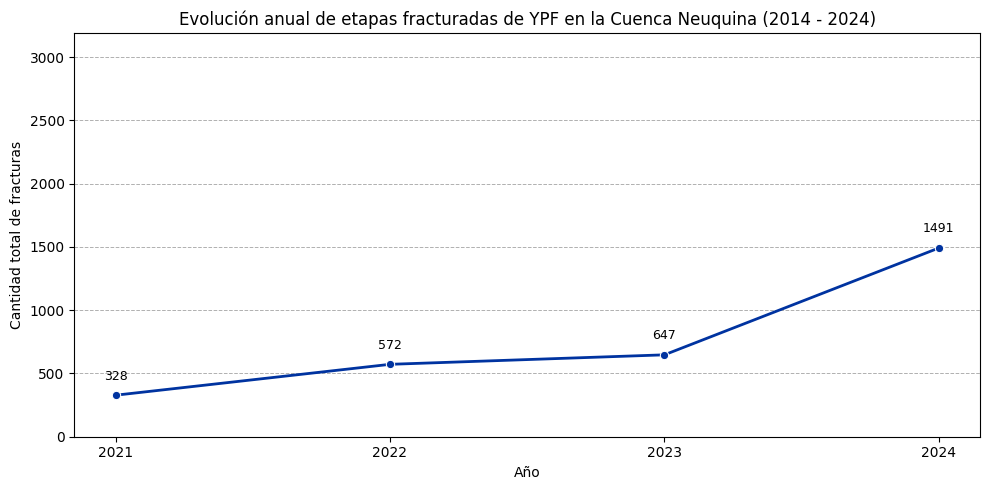

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular fracturas totales por año
fractures_per_year = ef_pluspetrol_total.groupby('anio')['cantidad_fracturas'].sum().reset_index()

# Filtrar desde 2014 hasta 2024
fractures_per_year_filtered = fractures_per_year[
    (fractures_per_year['anio'] >= 2021) & (fractures_per_year['anio'] <= 2024)
]

# Crear gráfico
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    data=fractures_per_year_filtered,
    x='anio',
    y='cantidad_fracturas',
    marker='o',
    color='#0033A0',  # Azul fuerte YPF
    linewidth=2
)

# Título y etiquetas
plt.title('Evolución anual de etapas fracturadas de YPF en la Cuenca Neuquina (2014 - 2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad total de fracturas')
plt.xticks(fractures_per_year_filtered['anio'])

# Configurar líneas de la grilla
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7)

# Agregar etiquetas sobre cada punto
for i, row in fractures_per_year_filtered.iterrows():
    ax.text(row['anio'], row['cantidad_fracturas'] + 100,
            str(int(row['cantidad_fracturas'])),
            ha='center', va='bottom', fontsize=9)

# Extender límite del eje Y
y_max = fractures_per_year_filtered['cantidad_fracturas'].max()
plt.ylim(0, y_max + 1700)

plt.tight_layout()
plt.show()

In [35]:
#Filtro por cada dataset solo los registros para YPF S.A.
ef_pluspetrol = etapasfracturadas[(etapasfracturadas['empresa_informante'] == 'PLUSPETROL S.A.')&(etapasfracturadas['cuenca'] == 'NEUQUINA')&(etapasfracturadas['anio']>2020)]

ef_pluspetrol

,idpozo,cuenca,areapermisoconcesion,yacimiento,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,empresa_informante,mes,anio
2638,162181,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2018.0,32,Tapón disparo,8386.63,0.0,67229.0,0.0,11427.0,21945.0,PLUSPETROL S.A.,2,2021
2639,162182,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2151.0,29,Tapón disparo,6470.52,0.0,48866.0,0.0,11200.0,22368.0,PLUSPETROL S.A.,2,2021
2640,162183,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2117.0,34,Tapón disparo,8873.59,0.0,39182.0,0.0,11263.0,22256.0,PLUSPETROL S.A.,2,2021
3350,163134,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2498.0,38,Tapón disparo,8213.33,0.0,60648.0,0.0,11421.0,19460.0,PLUSPETROL S.A.,1,2022
3351,163135,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2510.0,37,Tapón disparo,7985.75,0.0,59052.0,0.0,11229.0,20346.0,PLUSPETROL S.A.,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,166169,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3586.0,56,Tapón disparo,13036.00,0.0,123074.0,0.0,11891.0,22038.0,PLUSPETROL S.A.,3,2025
4149,166179,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3589.0,59,Tapón disparo,13749.00,0.0,127946.0,0.0,11701.0,21518.0,PLUSPETROL S.A.,3,2025
4150,166168,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2733.0,44,Tapón disparo,10200.00,0.0,68120.0,0.0,11176.0,22462.0,PLUSPETROL S.A.,4,2025
4151,166180,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2658.0,43,Tapón disparo,10043.00,0.0,66216.0,0.0,11785.0,22580.0,PLUSPETROL S.A.,4,2025


In [36]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
ef_pluspe=ef_pluspetrol.rename(columns={'anio':'Año','idpozo':'ID pozo','mes':'Mes','empresa_informante':'Empresa informante','cuenca':'Cuenca','areapermisoconcesion':'Área permiso concesión','yacimiento':'Yacimiento','tipo_reservorio':'Tipo reservorio','subtipo_reservorio':'Subtipo reservorio','longitud_rama_horizontal_m':'Longitud rama horizontal (m)','cantidad_fracturas':'Cantidad fracturas','tipo_terminacion':'Tipo terminación','arena_bombeada_nacional_tn':'Arena bombeada nacional (tn)','arena_bombeada_importada_tn':'Arena bombeada importada (tn)','agua_inyectada_m3':'Agua inyectada (m3)','co2_inyectado_m3':'CO2 inyectado (m3)','presion_maxima_psi':'Presión máxima (psi)','potencia_equipos_fractura_hp':'Potencia equipos fractura (hp)'})
ef_pluspe

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
2638,162181,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2018.0,32,Tapón disparo,8386.63,0.0,67229.0,0.0,11427.0,21945.0,PLUSPETROL S.A.,2,2021
2639,162182,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2151.0,29,Tapón disparo,6470.52,0.0,48866.0,0.0,11200.0,22368.0,PLUSPETROL S.A.,2,2021
2640,162183,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2117.0,34,Tapón disparo,8873.59,0.0,39182.0,0.0,11263.0,22256.0,PLUSPETROL S.A.,2,2021
3350,163134,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2498.0,38,Tapón disparo,8213.33,0.0,60648.0,0.0,11421.0,19460.0,PLUSPETROL S.A.,1,2022
3351,163135,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2510.0,37,Tapón disparo,7985.75,0.0,59052.0,0.0,11229.0,20346.0,PLUSPETROL S.A.,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,166169,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3586.0,56,Tapón disparo,13036.00,0.0,123074.0,0.0,11891.0,22038.0,PLUSPETROL S.A.,3,2025
4149,166179,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3589.0,59,Tapón disparo,13749.00,0.0,127946.0,0.0,11701.0,21518.0,PLUSPETROL S.A.,3,2025
4150,166168,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2733.0,44,Tapón disparo,10200.00,0.0,68120.0,0.0,11176.0,22462.0,PLUSPETROL S.A.,4,2025
4151,166180,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2658.0,43,Tapón disparo,10043.00,0.0,66216.0,0.0,11785.0,22580.0,PLUSPETROL S.A.,4,2025


In [37]:
#Vamos a ver que tipo de estructura tiene ef_tecpetrol
type(ef_pluspe)

pandas.core.frame.DataFrame

In [38]:
#Con la función shape podemos ver la cantidad de observaciones y feature que contiene el dataframe ef_ypf
ef_pluspe.shape

(76, 18)

In [39]:
#Con la función columns podemos ver el nombre de todos los features que contiene el dataframe ef_ypf
ef_pluspe.columns

Index(['ID pozo', 'Cuenca', 'Área permiso concesión', 'Yacimiento',
       'Tipo reservorio', 'Subtipo reservorio', 'Longitud rama horizontal (m)',
       'Cantidad fracturas', 'Tipo terminación',
       'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
       'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)',
       'Potencia equipos fractura (hp)', 'Empresa informante', 'Mes', 'Año'],
      dtype='object')

In [40]:
#A través de la función head() puedo visualizar las primeras 5 observaciones del dataframe
ef_pluspe.head()

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
2638,162181,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2018.0,32,Tapón disparo,8386.63,0.0,67229.0,0.0,11427.0,21945.0,PLUSPETROL S.A.,2,2021
2639,162182,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2151.0,29,Tapón disparo,6470.52,0.0,48866.0,0.0,11200.0,22368.0,PLUSPETROL S.A.,2,2021
2640,162183,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2117.0,34,Tapón disparo,8873.59,0.0,39182.0,0.0,11263.0,22256.0,PLUSPETROL S.A.,2,2021
3350,163134,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2498.0,38,Tapón disparo,8213.33,0.0,60648.0,0.0,11421.0,19460.0,PLUSPETROL S.A.,1,2022
3351,163135,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2510.0,37,Tapón disparo,7985.75,0.0,59052.0,0.0,11229.0,20346.0,PLUSPETROL S.A.,1,2022


In [41]:
#Mientras que con la función tail(10) puedo observar los últimos 10 registros de información del dataset ef_ypf
ef_pluspe.tail(10)

,ID pozo,Cuenca,Área permiso concesión,Yacimiento,Tipo reservorio,Subtipo reservorio,Longitud rama horizontal (m),Cantidad fracturas,Tipo terminación,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp),Empresa informante,Mes,Año
4080,165694,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3117.0,52,Tapón disparo,12308.71,0.0,103256.00,0.0,11554.0,22295.0,PLUSPETROL S.A.,11,2024
4144,165634,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3056.0,51,Tapón disparo,12086.58,0.0,100341.18,0.0,11576.0,22367.0,PLUSPETROL S.A.,12,2024
4145,165695,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3082.0,51,Tapón disparo,12058.00,0.0,101962.00,0.0,11542.0,21996.0,PLUSPETROL S.A.,12,2024
4146,165696,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2962.0,49,Tapón disparo,11645.00,0.0,98778.92,0.0,11593.0,21980.0,PLUSPETROL S.A.,12,2024
4147,166165,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3558.0,54,Tapón disparo,12325.00,0.0,115065.00,0.0,11867.0,21970.0,PLUSPETROL S.A.,3,2025
4148,166169,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3586.0,56,Tapón disparo,13036.00,0.0,123074.00,0.0,11891.0,22038.0,PLUSPETROL S.A.,3,2025
4149,166179,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,3589.0,59,Tapón disparo,13749.00,0.0,127946.00,0.0,11701.0,21518.0,PLUSPETROL S.A.,3,2025
4150,166168,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2733.0,44,Tapón disparo,10200.00,0.0,68120.00,0.0,11176.0,22462.0,PLUSPETROL S.A.,4,2025
4151,166180,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2658.0,43,Tapón disparo,10043.00,0.0,66216.00,0.0,11785.0,22580.0,PLUSPETROL S.A.,4,2025
4152,166221,NEUQUINA,LA CALERA,LA CALERA,NO CONVENCIONAL,SHALE,2606.0,43,Tapón disparo,9963.00,0.0,68115.00,0.0,11706.0,22424.0,PLUSPETROL S.A.,4,2025


In [42]:
#Con dtypes podemos visualizar el tipo de dato de cada feature del dataset, el mismo contiene datos enteros, flotantes y objeto
ef_pluspe.dtypes

,0
ID pozo,int64
Cuenca,object
Área permiso concesión,object
Yacimiento,object
Tipo reservorio,object
Subtipo reservorio,object
Longitud rama horizontal (m),float64
Cantidad fracturas,int64
Tipo terminación,object
Arena bombeada nacional (tn),float64


In [43]:
#Vamos a ver si el dataset presenta datos faltantes con la función isnull().sum() , el resultado nos arroja que el dataset no contiene datos faltantes
datosfaltantes=ef_pluspe.isnull().sum()
datosfaltantes

,0
ID pozo,0
Cuenca,0
Área permiso concesión,0
Yacimiento,0
Tipo reservorio,0
Subtipo reservorio,0
Longitud rama horizontal (m),0
Cantidad fracturas,0
Tipo terminación,0
Arena bombeada nacional (tn),0


In [44]:
print(ef_pluspe.columns.tolist())


['ID pozo', 'Cuenca', 'Área permiso concesión', 'Yacimiento', 'Tipo reservorio', 'Subtipo reservorio', 'Longitud rama horizontal (m)', 'Cantidad fracturas', 'Tipo terminación', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)', 'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)', 'Empresa informante', 'Mes', 'Año']


In [45]:
#Aplicamos la función describe para poder visualizar la estadistica descriptiva de algunas features en particular
ef_pluspe[['Cantidad fracturas','Arena bombeada nacional (tn)','Arena bombeada importada (tn)','Agua inyectada (m3)','CO2 inyectado (m3)','Presión máxima (psi)','Potencia equipos fractura (hp)']].describe()


,Cantidad fracturas,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp)
count,76.000000,76.000000,76.0,76.000000,76.0,76.000000,76.000000
mean,43.907895,10121.748974,0.0,81805.569355,0.0,11439.223684,21334.089474
std,9.427870,2217.131771,0.0,21523.309252,0.0,269.478588,1291.970610
min,16.000000,3633.500000,0.0,37161.045000,0.0,10795.000000,16814.000000
25%,38.000000,8451.460000,0.0,62373.500000,0.0,11217.500000,20750.500000
50%,45.000000,10409.890000,0.0,81487.919500,0.0,11428.000000,21739.500000
75%,51.250000,12092.520000,0.0,101232.865250,0.0,11672.000000,22232.250000
max,60.000000,13749.000000,0.0,127946.000000,0.0,11974.000000,23944.000000


In [46]:
#Se utiliza la función groupby para calcular la media de las variables anteriores a partir del año 2023 por mes
ef_pluspe.groupby(['Año','Mes'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].mean()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes                                                     
2021 2             33.333333                   7637.770000   
     5             42.666667                   9349.973333   
2022 1             37.333333                   8060.926667   
     4             24.666667                   5957.093333   
     7             38.666667                   8481.143333   
     9             42.333333                   9149.980000   
     12            47.666667                  11820.066667   
2023 3             52.000000                  11957.836667   
     4             32.666667                   7392.430000   
     6             43.666667                  10247.060000   
     9             40.333333                   9149.186667   
     10            47.000000                  10572.720000   
2024 1             53.666667                  12251.927333   
     2             49.666667                  11183.276667   
     4             45.000000                  10255.942857   
     6             19.000000                   4521.590000   
     8             43.000000                  10295.080000   
     9             50.000000                  11915.500000   
     10            52.750000                  12521.875000   
     11            52.000000                  12217.310000   
     12            50.333333                  11929.860000   
2025 3             56.333333                  13036.666667   
     4             43.333333                  10068.666667   

          Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes                                                       
2021 2                              0.0         53879.500000   
     5                              0.0         73135.000000   
2022 1                              0.0         59584.000000   
     4                              0.0         51708.000000   
     7                              0.0         61712.000000   
     9                              0.0         76536.000000   
     12                             0.0         84565.666667   
2023 3                              0.0         98767.333333   
     4                              0.0         58084.000000   
     6                              0.0         79062.666667   
     9                              0.0         68601.000000   
     10                             0.0         80925.050333   
2024 1                              0.0        106134.995667   
     2                              0.0         94981.738333   
     4                              0.0         87603.787857   
     6                              0.0         37161.045000   
     8                              0.0         87148.086000   
     9                              0.0         99916.000000   
     10                             0.0        105749.000000   
     11                             0.0        102814.666667   
     12                             0.0        100360.700000   
2025 3                              0.0        122028.333333   
     4                              0.0         67483.666667   

          CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes                                             
2021 2                   0.0          11233.666667   
     5                   0.0          10876.000000   
2022 1                   0.0          11337.000000   
     4                   0.0          11134.333333   
     7                   0.0          11419.000000   
     9                   0.0          11308.333333   
     12                  0.0          11170.000000   
2023 3                   0.0          11290.333333   
     4                   0.0          11224.000000   
     6                   0.0          11103.000000   
     9                   0.0          11339.333333   
     10                  0.0          11402.333333   
2024 1                   0.0          11437.666667   
     2                   0.0          11715.3333

In [47]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2021 por mes
ef_pluspe.groupby(['Año','Mes'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes                                                     
2021 2                   200                     45826.620   
     5                   128                     28049.920   
2022 1                   112                     24182.780   
     4                    74                     17871.280   
     7                   116                     25443.430   
     9                   127                     27449.940   
     12                  143                     35460.200   
2023 3                   156                     35873.510   
     4                    98                     22177.290   
     6                   131                     30741.180   
     9                   121                     27447.560   
     10                  141                     31718.160   
2024 1                   161                     36755.782   
     2                   149                     33549.830   
     4                   315                     71791.600   
     6                    19                      4521.590   
     8                   129                     30885.240   
     9                   200                     47662.000   
     10                  211                     50087.500   
     11                  156                     36651.930   
     12                  151                     35789.580   
2025 3                   169                     39110.000   
     4                   130                     30206.000   

          Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes                                                       
2021 2                              0.0           323277.000   
     5                              0.0           219405.000   
2022 1                              0.0           178752.000   
     4                              0.0           155124.000   
     7                              0.0           185136.000   
     9                              0.0           229608.000   
     12                             0.0           253697.000   
2023 3                              0.0           296302.000   
     4                              0.0           174252.000   
     6                              0.0           237188.000   
     9                              0.0           205803.000   
     10                             0.0           242775.151   
2024 1                              0.0           318404.987   
     2                              0.0           284945.215   
     4                              0.0           613226.515   
     6                              0.0            37161.045   
     8                              0.0           261444.258   
     9                              0.0           399664.000   
     10                             0.0           422996.000   
     11                             0.0           308444.000   
     12                             0.0           301082.100   
2025 3                              0.0           366085.000   
     4                              0.0           202451.000   

          CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes                                             
2021 2                   0.0               67402.0   
     5                   0.0               32628.0   
2022 1                   0.0               34011.0   
     4                   0.0               33403.0   
     7                   0.0               34257.0   
     9                   0.0               33925.0   
     12                  0.0               33510.0   
2023 3                   0.0               33871.0   
     4                   0.0               33672.0   
     6                   0.0               33309.0   
     9                   0.0               34018.0   
     10                  0.0               34207.0   
2024 1                   0.0               34313.0   
     2                   0.0               35146

In [48]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2021 por mes y por ID de pozo
ef_pluspe.groupby(['Año','Mes','ID pozo'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum()

Cantidad fracturas  Arena bombeada nacional (tn)  \
Año  Mes ID pozo                                                     
2021 2   162181                   32                       8386.63   
         162182                   29                       6470.52   
         162183                   34                       8873.59   
         162324                   35                       7562.39   
         162325                   31                       6495.71   
...                              ...                           ...   
2025 3   166169                   56                      13036.00   
         166179                   59                      13749.00   
     4   166168                   44                      10200.00   
         166180                   43                      10043.00   
         166221                   43                       9963.00   

                  Arena bombeada importada (tn)  Agua inyectada (m3)  \
Año  Mes ID pozo                                                       
2021 2   162181                             0.0              67229.0   
         162182                             0.0              48866.0   
         162183                             0.0              39182.0   
         162324                             0.0              56000.0   
         162325                             0.0              49600.0   
...                                         ...                  ...   
2025 3   166169                             0.0             123074.0   
         166179                             0.0             127946.0   
     4   166168                             0.0              68120.0   
         166180                             0.0              66216.0   
         166221                             0.0              68115.0   

                  CO2 inyectado (m3)  Presión máxima (psi)  \
Año  Mes ID pozo                                             
2021 2   162181                  0.0               11427.0   
         162182                  0.0               11200.0   
         162183                  0.0               11263.0   
         162324                  0.0               11131.0   
         162325                  0.0               11233.0   
...                              ...                   ...   
2025 3   166169                  0.0               11891.0   
         166179                  0.0               11701.0   
     4   166168                  0.0               11176.0   
         166180                  0.0               11785.0   
         166221                  0.0               11706.0   

                  Potencia equipos fractura (hp)  
Año  Mes ID pozo                                  
2021 2   162181                          21945.0  
         162182                          22368.0  
         162183                          22256.0  
         162324                          20818.0  
         162325                          20190.0  
...                                          ...  
2025 3   166169                          22038.0  
         166179                          21518.0  
     4   166168                          22462.0  
         166180                          22580.0  
         166221                          22424.0  

[76 rows x 7 columns]

In [50]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2021 por mes desde el área con mayor cantidad de fracturas por año
ef_pluspe[ef_pluspe['Año'] >= 2020].groupby(['Área permiso concesión','Año'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum().sort_values(by='Año', ascending=False)

Cantidad fracturas  Arena bombeada nacional (tn)  \
Área permiso concesión Año                                                      
LA CALERA              2025                 299                     69316.000   
                       2024                1318                    306346.212   
AGUADA VILLANUEVA      2024                  44                     10463.600   
LOMA JARILLOSA ESTE    2024                 129                     30885.240   
LA CALERA              2023                 647                    147957.700   
                       2022                 572                    130407.630   
                       2021                 328                     73876.540   

                             Arena bombeada importada (tn)  \
Área permiso concesión Año                                   
LA CALERA              2025                            0.0   
                       2024                            0.0   
AGUADA VILLANUEVA      2024                            0.0   
LOMA JARILLOSA ESTE    2024                            0.0   
LA CALERA              2023                            0.0   
                       2022                            0.0   
                       2021                            0.0   

                             Agua inyectada (m3)  CO2 inyectado (m3)  \
Área permiso concesión Año                                             
LA CALERA              2025           568536.000                 0.0   
                       2024          2599343.262                 0.0   
AGUADA VILLANUEVA      2024            86580.600                 0.0   
LOMA JARILLOSA ESTE    2024           261444.258                 0.0   
LA CALERA              2023          1156320.151                 0.0   
                       2022          1002317.000                 0.0   
                       2021           542682.000                 0.0   

                             Presión máxima (psi)  \
Área permiso concesión Año                          
LA CALERA              2025               70126.0   
                       2024              302716.0   
AGUADA VILLANUEVA      2024               23230.0   
LOMA JARILLOSA ESTE    2024               35096.0   
LA CALERA              2023              169077.0   
                       2022              169106.0   
                       2021              100030.0   

                             Potencia equipos fractura (hp)  
Área permiso concesión Año                                   
LA CALERA              2025                        132992.0  
                       2024                        579535.0  
AGUADA VILLANUEVA      2024                         42429.0  
LOMA JARILLOSA ESTE    2024                         62749.0  
LA CALERA              2023                        314002.8  
                       2022                        304053.0  
                       2021                        185630.0

In [51]:
#Se utiliza la función groupby para calcular la suma de las variables anteriores a partir del año 2023 por mes desde el área con mayor cantidad de fracturas por año
ef_pluspe[ef_pluspe['Año'] >= 2020].groupby(['Área permiso concesión'])[
    ['Cantidad fracturas', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
     'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)']
].sum().sort_values(by='Cantidad fracturas', ascending=False)

,Cantidad fracturas,Arena bombeada nacional (tn),Arena bombeada importada (tn),Agua inyectada (m3),CO2 inyectado (m3),Presión máxima (psi),Potencia equipos fractura (hp)
Área permiso concesión,,,,,,,
LA CALERA,3164,727904.082,0.0,5869198.413,0.0,811055.0,1516212.8
LOMA JARILLOSA ESTE,129,30885.240,0.0,261444.258,0.0,35096.0,62749.0
AGUADA VILLANUEVA,44,10463.600,0.0,86580.600,0.0,23230.0,42429.0


In [52]:
#Filtrar por Loma Campana
loma = ef_pluspe[ef_pluspe['Área permiso concesión'] == 'LOMA CAMPANA']

In [ ]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion0 = loma.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [ ]:
#Crea una columna de fecha para orden cronológico
evolucion0['Fecha'] = pd.to_datetime(evolucion0['Año'].astype(str) + '-' + evolucion0['Mes'].astype(str))

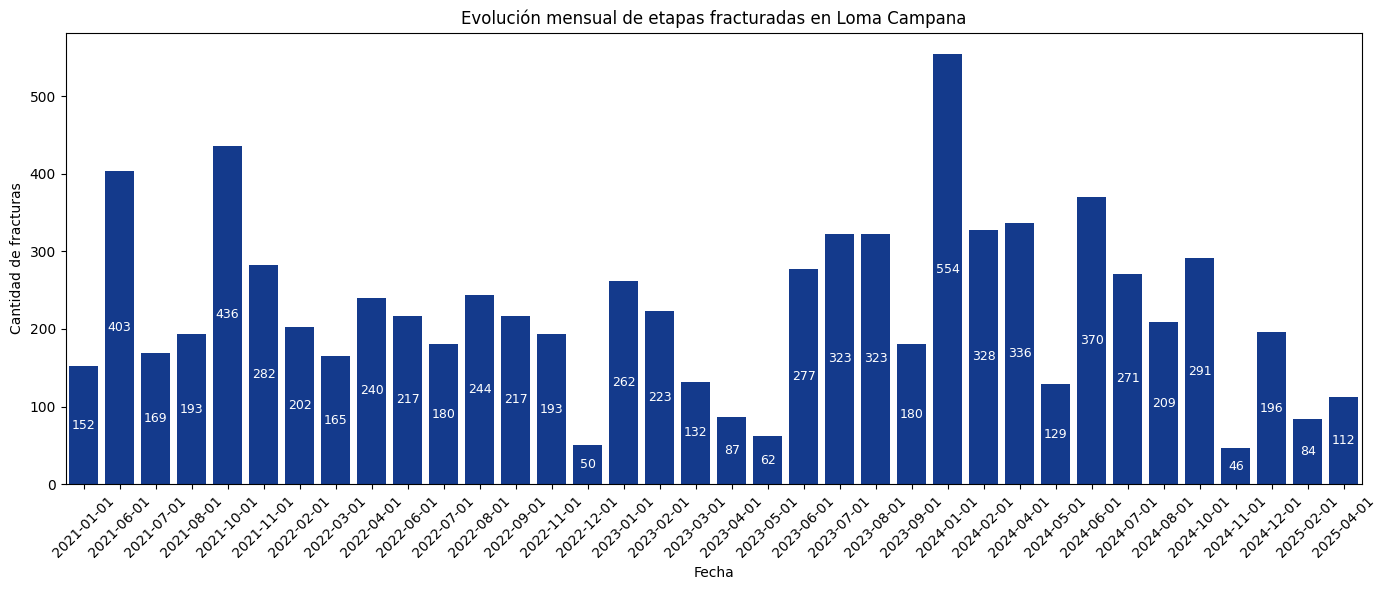

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion0, x='Fecha', y='Cantidad fracturas', color='#0033A0')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Loma Campana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
print(ef_pluspe.columns.tolist())

['ID pozo', 'Cuenca', 'Área permiso concesión', 'Yacimiento', 'Tipo reservorio', 'Subtipo reservorio', 'Longitud rama horizontal (m)', 'Cantidad fracturas', 'Tipo terminación', 'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)', 'Agua inyectada (m3)', 'CO2 inyectado (m3)', 'Presión máxima (psi)', 'Potencia equipos fractura (hp)', 'Empresa informante', 'Mes', 'Año']


In [58]:
ef_pluspe['Área permiso concesión'].unique()

array(['LA CALERA', 'AGUADA VILLANUEVA', 'LOMA JARILLOSA ESTE'],
      dtype=object)

In [59]:
#Filtrar por La Amarga Chica
laamargachica = ef_pluspe[ef_pluspe['Área permiso concesión'] == 'LA CALERA']

In [60]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion1 = laamargachica.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [61]:
#Crea una columna de fecha para orden cronológico
evolucion1['Fecha'] = pd.to_datetime(evolucion1['Año'].astype(str) + '-' + evolucion1['Mes'].astype(str))

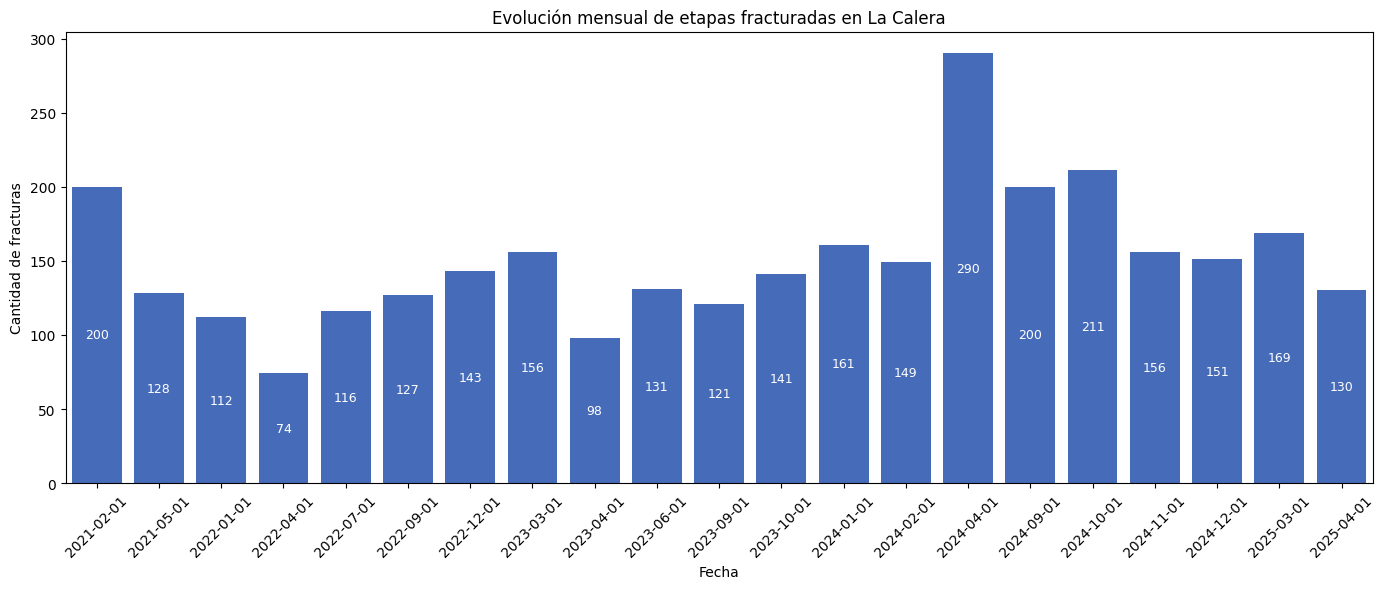

In [63]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion1, x='Fecha', y='Cantidad fracturas', color='#3366CC')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en La Calera')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
#Filtrar por Bandurria Sur
bandurriasur = ef_pluspe[ef_pluspe['Área permiso concesión'] == 'AGUADA VILLANUEVA']

In [65]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion2 = bandurriasur.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [66]:
#Crea una columna de fecha para orden cronológico
evolucion2['Fecha'] = pd.to_datetime(evolucion2['Año'].astype(str) + '-' + evolucion2['Mes'].astype(str))

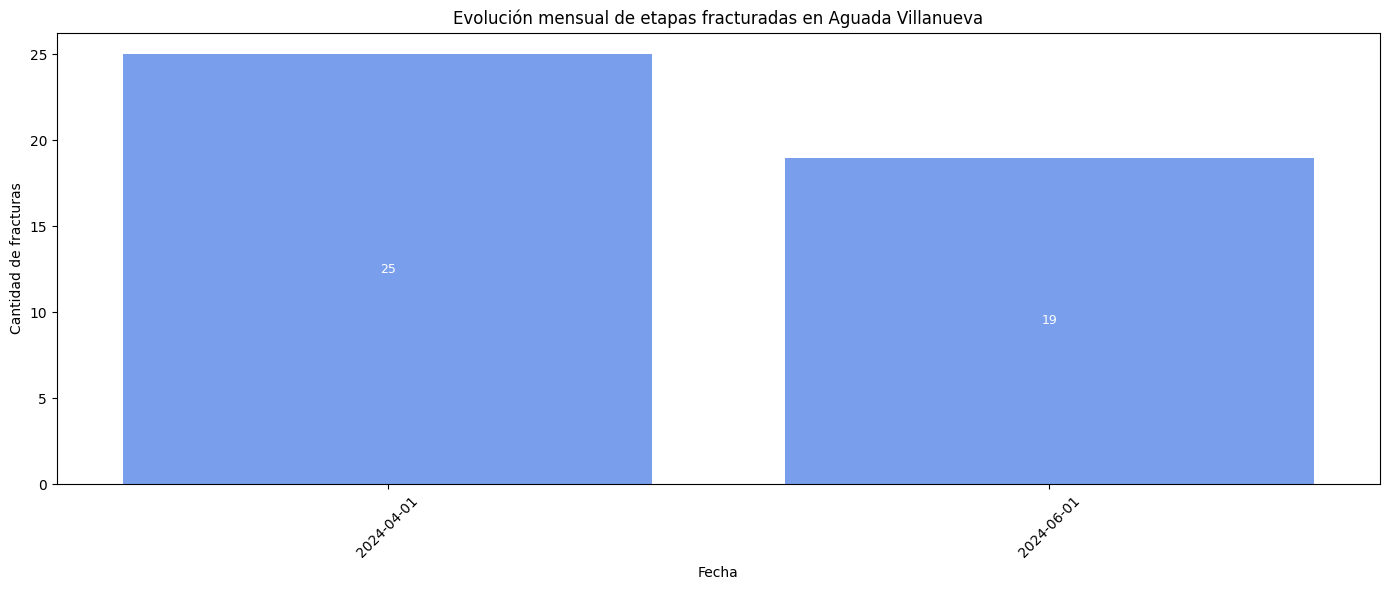

In [68]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion2, x='Fecha', y='Cantidad fracturas', color='#6699FF')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Aguada Villanueva')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
#Filtrar por Aguada del Chañar
aguadadelchañar = ef_pluspe[ef_pluspe['Área permiso concesión'] == 'LOMA JARILLOSA ESTE']

In [71]:
#Agrupa por año y mes, y suma etapas fracturadas
evolucion3 = aguadadelchañar.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

In [72]:
#Crea una columna de fecha para orden cronológico
evolucion3['Fecha'] = pd.to_datetime(evolucion3['Año'].astype(str) + '-' + evolucion2['Mes'].astype(str))

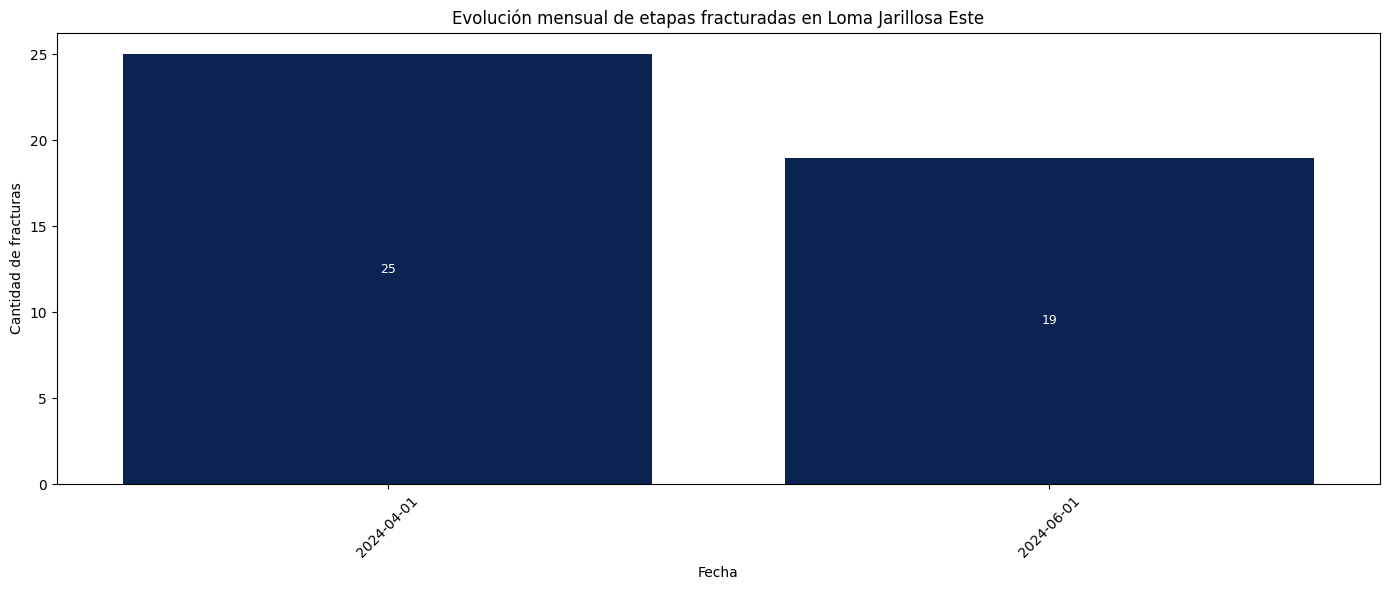

In [74]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=evolucion2, x='Fecha', y='Cantidad fracturas', color='#001F5B')

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v)}" for v in container.datavalues],
                 label_type='center', color='white', fontsize=9)
plt.title('Evolución mensual de etapas fracturadas en Loma Jarillosa Este')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de fracturas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
df_loma = ef_pluspe[(ef_pluspe['Área permiso concesión'] == 'LA CALERA') & (ef_pluspe['Año'] >= 2020)]


In [77]:
df_grouped = df_loma.groupby(['Año', 'Mes'])[
    'Arena bombeada nacional (tn)'
].sum().reset_index()

In [78]:
df_grouped['Fecha'] = pd.to_datetime(df_grouped['Año'].astype(str) + '-' + df_grouped['Mes'].astype(str) + '-01')

In [79]:
df_grouped = df_grouped.sort_values('Fecha')

In [80]:
df_grouped['AñoMes'] = df_grouped['Fecha'].dt.strftime('%Y-%m')

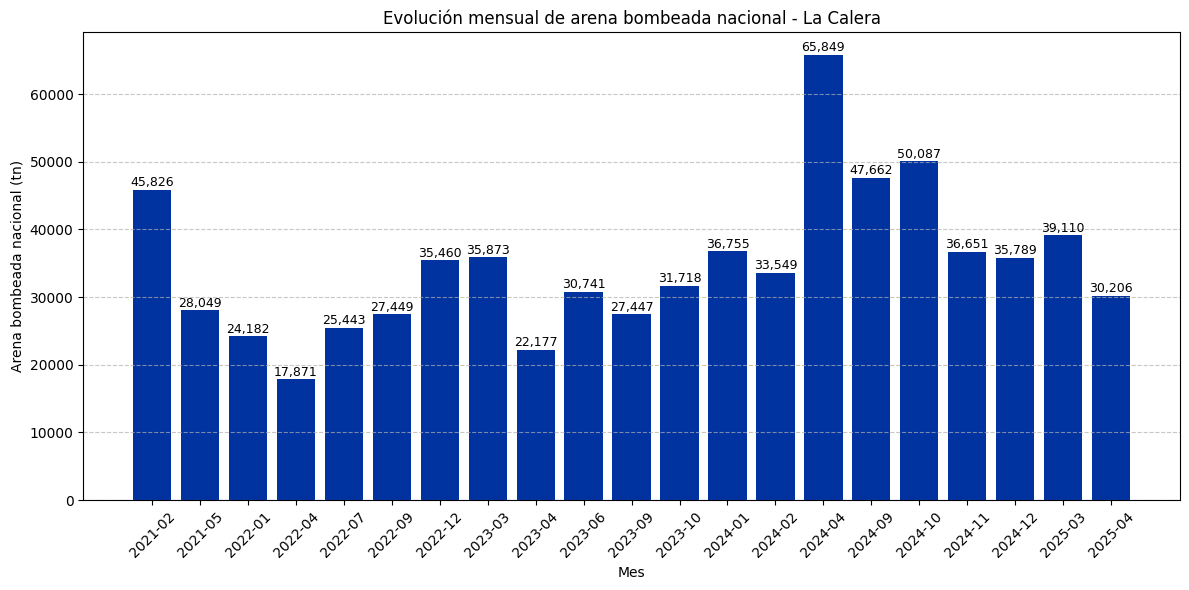

In [82]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_grouped['AñoMes'],
               df_grouped['Arena bombeada nacional (tn)'],
               color='#0033A0')

# Etiquetas en cada barra (enteros)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,  # 100 es un pequeño espacio arriba
             f'{int(height):,}',  # separador de miles
             ha='center', va='bottom', fontsize=9)

plt.title('Evolución mensual de arena bombeada nacional - La Calera')
plt.xlabel('Mes')
plt.ylabel('Arena bombeada nacional (tn)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

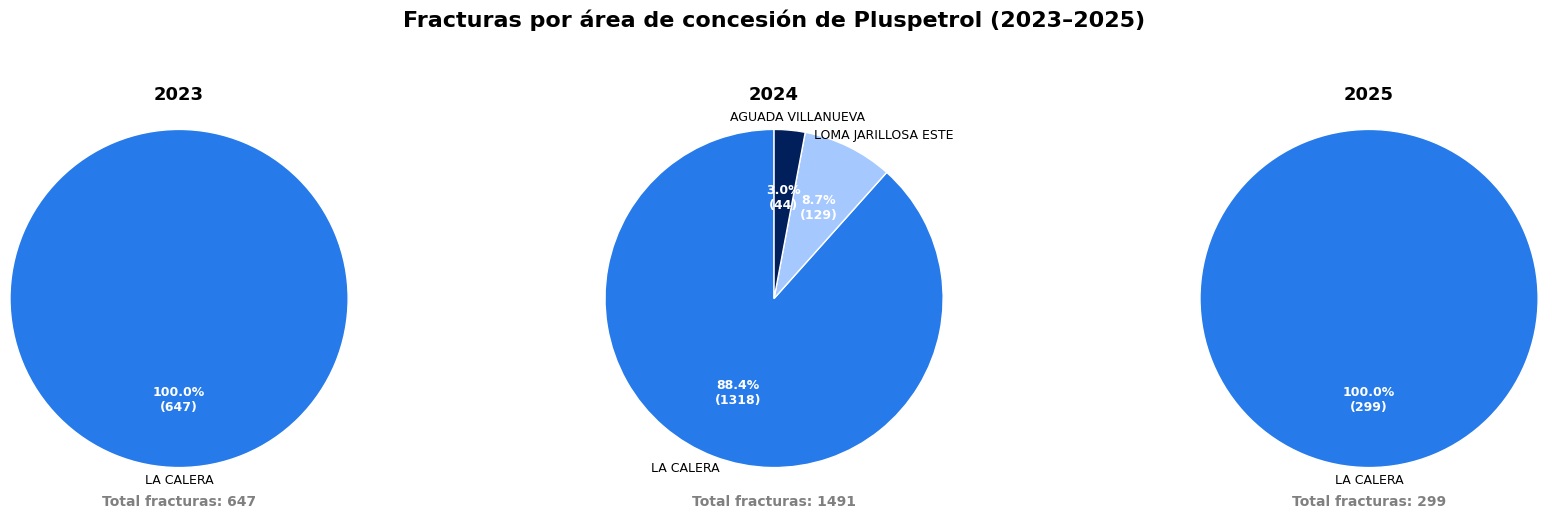

In [84]:
años_filtrados = [2023, 2024, 2025]

grouped = ef_pluspe.groupby(['Año', 'Área permiso concesión'])['Cantidad fracturas'].sum().reset_index()
grouped = grouped[grouped['Año'].isin(años_filtrados)]


# Función para obtener top 5 + Otros
def top5_mas_otros(df):
    df = df.sort_values('Cantidad fracturas', ascending=False)
    top5 = df.iloc[:5]
    otros = df.iloc[5:]
    otros_sum = otros['Cantidad fracturas'].sum()
    if otros_sum > 0:
        otros_df = pd.DataFrame([{'Área permiso concesión': 'Otros', 'Cantidad fracturas': otros_sum}])
        top5 = pd.concat([top5, otros_df], ignore_index=True)
    return top5.set_index('Área permiso concesión')['Cantidad fracturas']

# Obtener conjunto de todas las áreas que aparecen en los top 5 + Otros
todas_areas = set()
for year in años_filtrados:
    df_year = grouped[grouped['Año'] == year]
    series = top5_mas_otros(df_year)
    todas_areas.update(series.index)

# Ordenar las áreas para que el mapeo sea reproducible
todas_areas = sorted(todas_areas)

semillas = ['#001F5B', '#0033A0', '#0055D4', '#4C9FFF', '#7BB9FF', '#A5C8FF']

# Crear paleta de colores extendida según cantidad de áreas únicas
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=len(todas_areas))

# Asignar un color único a cada área
colores_areas = {area: mpl.colors.rgb2hex(cmap(i / (len(todas_areas) - 1))) for i, area in enumerate(todas_areas)}

# Crear diccionario con Series para cada año con top 5 + otros
data_por_ano = {}
for year in años_filtrados:
    df_year = grouped[grouped['Año'] == year]
    data_por_ano[year] = top5_mas_otros(df_year)

# Paleta degradé azul YPF para 6 áreas (5+otros)
semillas = ['#001F5B', '#0033A0', '#0055D4', '#4C9FFF', '#7BB9FF', '#A5C8FF']
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=6)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, (year, series) in zip(axs, data_por_ano.items()):
    colors = [colores_areas[area] for area in series.index]
    wedges, _, autotexts = ax.pie(
        series,
        labels=None,
        startangle=90,
        colors=colors,
        radius=1.35,  # valor mayor a 1 agranda la torta
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        autopct=lambda p: f'{p:.1f}%\n({p*series.sum()/100:.0f})',
        textprops={'color': 'white', 'fontsize': 9, 'weight': 'bold'}
    )

    for i, wedge in enumerate(wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(ang)) * 1.99
        y = np.sin(np.deg2rad(ang)) * 1.45
        ax.text(
            x, y,
            series.index[i],
            ha='center', va='center',
            fontsize=9, color='black'
        )
    ax.set_title(f'{year}', fontsize=13, fontweight='bold', pad=30)
    ax.text(0.5, -0.15, f'Total fracturas: {series.sum()}', ha='center', va='center',
        transform=ax.transAxes, fontsize=10,fontweight='bold', color='gray')



fig.suptitle('Fracturas por área de concesión de Pluspetrol (2023–2025)', fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

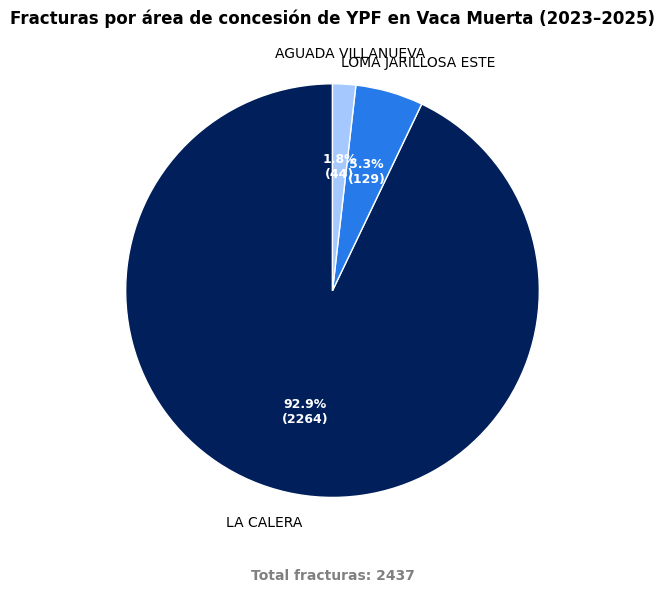

In [85]:
# 1) Filtrar años de interés (2023-2025)
años_filtrados = [2023, 2024, 2025]
ef_ypf_filtrado = ef_pluspe[ef_pluspe['Año'].isin(años_filtrados)]

# 2) Sumar fracturas por área en el periodo completo
totales = (
    ef_ypf_filtrado
    .groupby('Área permiso concesión')['Cantidad fracturas']
    .sum()
    .sort_values(ascending=False)
)

# 3) Top-5 + "Otros"
top5 = totales.head(5)
otros = totales.iloc[5:].sum()
if otros > 0:
    totales_plot = pd.concat([top5, pd.Series({'Otros': otros})])
else:
    totales_plot = top5        # por si solo hay 5 áreas

# 4) Paleta degradé azul YPF (6 pasos posibles)
semillas = ['#001F5B', '#0033A0', '#0055D4', '#4C9FFF', '#7BB9FF', '#A5C8FF']
cmap = mpl.colors.LinearSegmentedColormap.from_list('ypf_grad', semillas, N=len(totales_plot))
colors = [mpl.colors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, len(totales_plot))]

# 5) Graficar la única torta
fig, ax = plt.subplots(figsize=(6, 6))

wedges, _, _ = ax.pie(
    totales_plot,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    autopct=lambda p: f'{p:.1f}%\n({p*totales_plot.sum()/100:.0f})',
    textprops={'color': 'white', 'fontsize': 9, 'weight': 'bold'}
)

# Nombres afuera con líneas guía (opcional)
from matplotlib.patches import ConnectionPatch
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    tx, ty = x*1.50, y*1.15             # posición del texto
    ax.text(tx, ty, totales_plot.index[i],
            ha='center', va='center', fontsize=10, color='black')

ax.set_title('Fracturas por área de concesión de YPF en Vaca Muerta (2023–2025)', fontweight='bold')
ax.text(0.5, -0.05, f'Total fracturas: {totales_plot.sum()}', ha='center', va='center',
        transform=ax.transAxes, fontsize=10, fontweight='bold', color='gray')

#

plt.tight_layout()
plt.show()

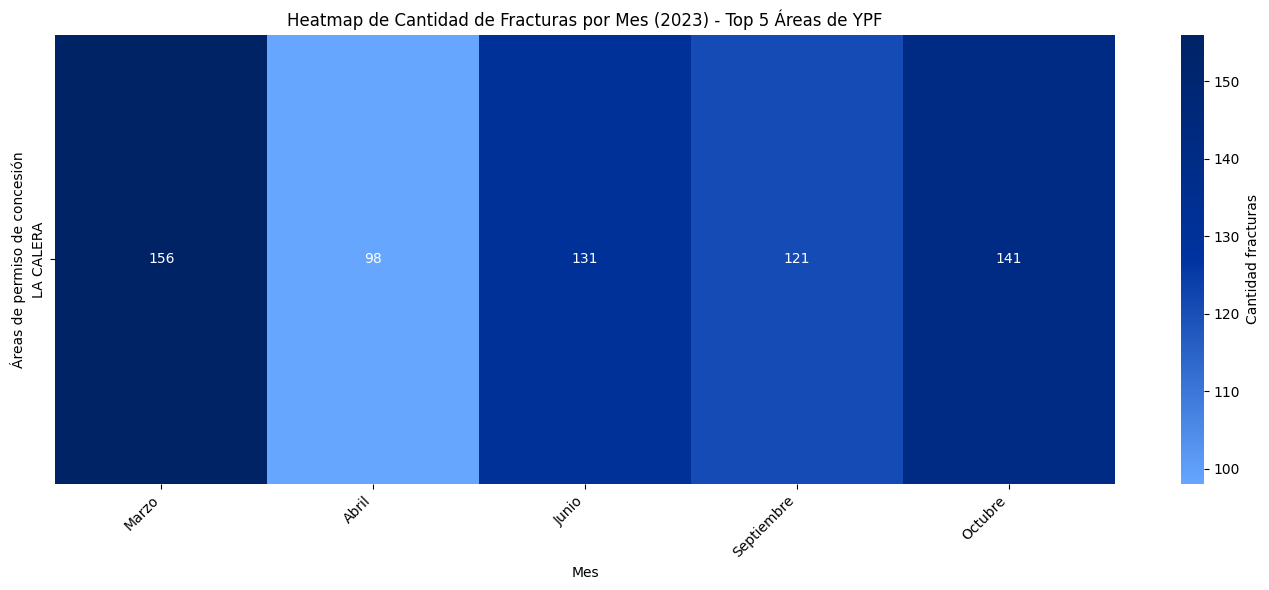

In [86]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

df_2023 = ef_pluspe[ef_pluspe['Año'] == 2023]

agg = df_2023.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF oscuro (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2023) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

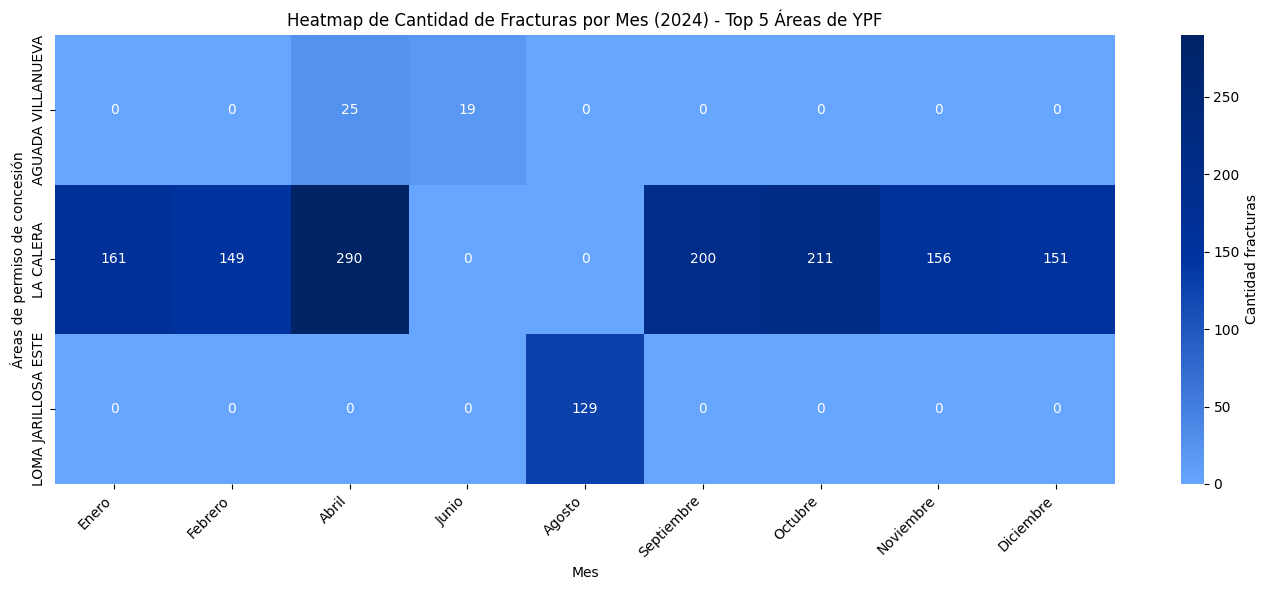

In [87]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar para año 2024
df_2024 = ef_pluspe[ef_pluspe['Año'] == 2024]

agg = df_2024.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF oscuro (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2024) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

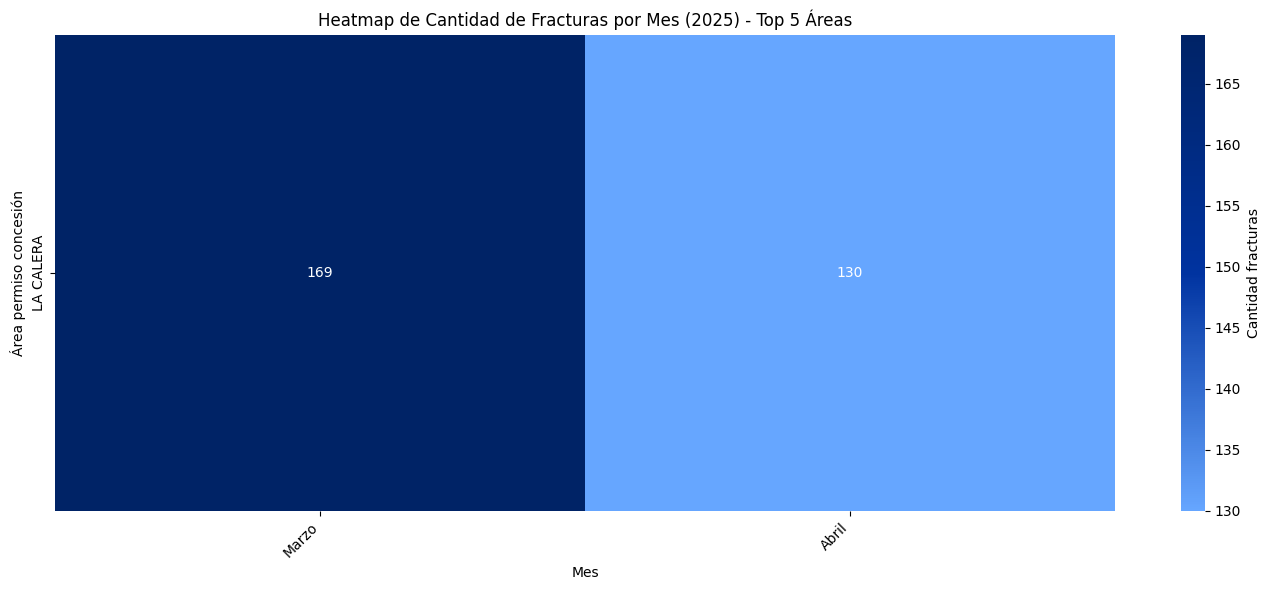

In [88]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar solo año 2025
df_2025 = ef_pluspe[ef_pluspe['Año'] == 2025]

# Agrupar por área y mes
agg = df_2025.groupby(['Área permiso concesión', 'Mes'])['Cantidad fracturas'].sum().reset_index()

# Top 5 áreas por cantidad total
top_5_areas = agg.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

# Pivot para heatmap
pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Cantidad fracturas').fillna(0)

# Nombres de meses en español
meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap invertido: celeste claro para 0, azul fuerte para valores altos
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF (medio)
     "#002366"]  # azul muy fuerte (máximo)
)

# Gráfico
plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Cantidad fracturas'})
ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Cantidad de Fracturas por Mes (2025) - Top 5 Áreas')
plt.xlabel('Mes')
plt.ylabel('Área permiso concesión')
plt.tight_layout()
plt.show()

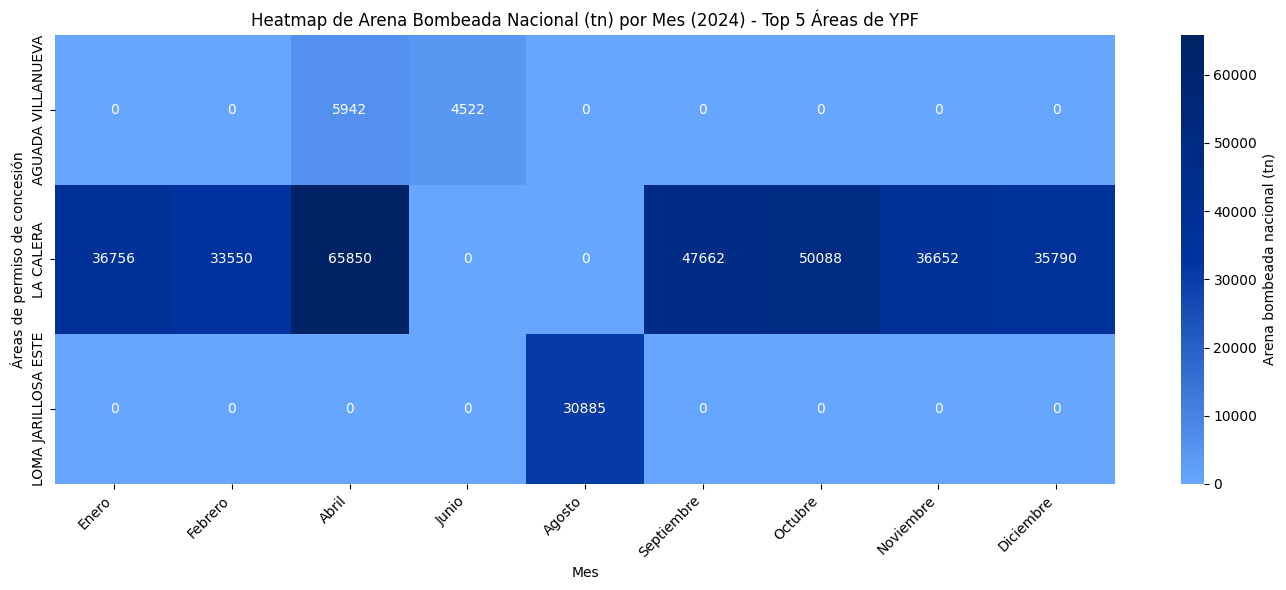

In [89]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar para año 2024
df_2024 = ef_pluspe[ef_pluspe['Año'] == 2024]

# Agrupación por área y mes para arena bombeada
agg = df_2024.groupby(['Área permiso concesión', 'Mes'])['Arena bombeada nacional (tn)'].sum().reset_index()

# Selección de top 5 áreas con mayor arena bombeada en total durante 2024
top_5_areas = agg.groupby('Área permiso concesión')['Arena bombeada nacional (tn)'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

# Crear tabla pivote
pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Arena bombeada nacional (tn)').fillna(0)

# Nombres de los meses para el eje X
meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap personalizado invertido
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF medio
     "#002366"]  # azul muy fuerte (máximo)
)

# Crear el heatmap
plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Arena bombeada nacional (tn)'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Arena Bombeada Nacional (tn) por Mes (2024) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

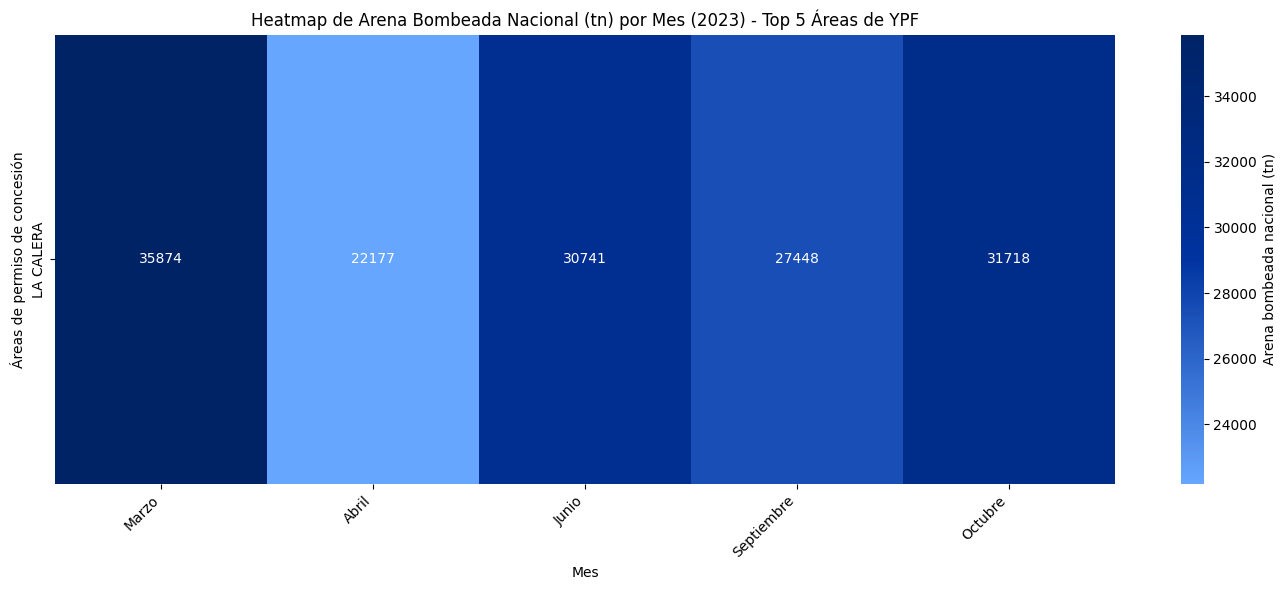

In [90]:
# Lista manual de meses en español
meses_es = [
    "", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Filtrar para año 2023
df_2023 = ef_pluspe[ef_pluspe['Año'] == 2023]

# Agrupación por área y mes para arena bombeada
agg = df_2023.groupby(['Área permiso concesión', 'Mes'])['Arena bombeada nacional (tn)'].sum().reset_index()

# Selección de top 5 áreas con mayor arena bombeada total en 2023
top_5_areas = agg.groupby('Área permiso concesión')['Arena bombeada nacional (tn)'].sum().nlargest(5).index
agg_top5 = agg[agg['Área permiso concesión'].isin(top_5_areas)]

# Crear tabla pivote
pivot_table = agg_top5.pivot(index='Área permiso concesión', columns='Mes', values='Arena bombeada nacional (tn)').fillna(0)

# Nombres de los meses para el eje X
meses_nombres = [meses_es[m] for m in pivot_table.columns]

# Colormap personalizado invertido
ypf_blue_invert = LinearSegmentedColormap.from_list(
    "ypf_blue_invert",
    ["#66A6FF",  # celeste claro (mínimo)
     "#0033A0",  # azul YPF medio
     "#002366"]  # azul muy fuerte (máximo)
)

# Crear el heatmap
plt.figure(figsize=(14, 6))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=ypf_blue_invert, cbar_kws={'label': 'Arena bombeada nacional (tn)'})

ax.set_xticklabels(meses_nombres, rotation=45, ha='right')

plt.title('Heatmap de Arena Bombeada Nacional (tn) por Mes (2023) - Top 5 Áreas de YPF')
plt.xlabel('Mes')
plt.ylabel('Áreas de permiso de concesión')
plt.tight_layout()
plt.show()

### **Distribución de las variables**

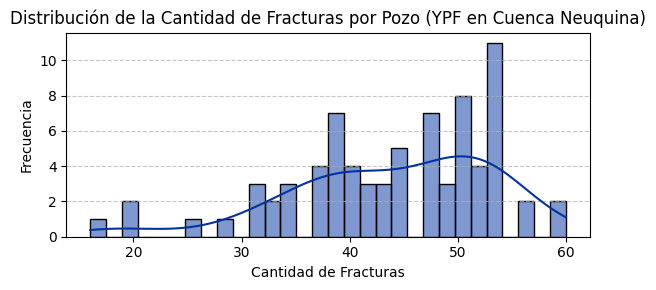

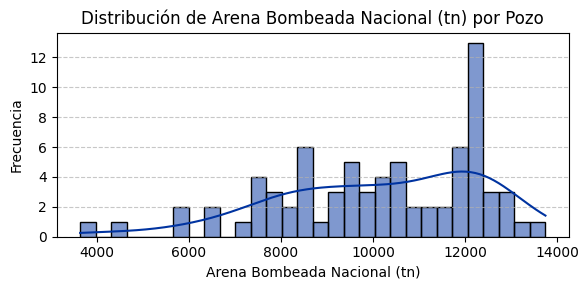

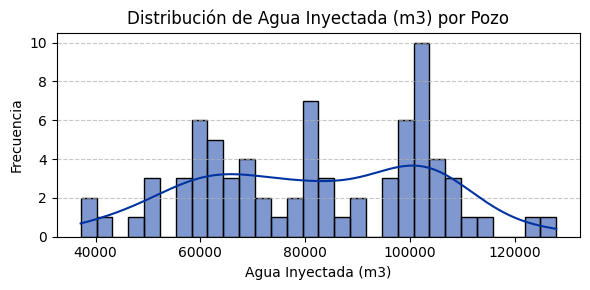

In [91]:
# histograma de los datos

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
sns.histplot(ef_pluspe['Cantidad fracturas'], bins=30, kde=True, color='#0033A0')
plt.title('Distribución de la Cantidad de Fracturas por Pozo (YPF en Cuenca Neuquina)')
plt.xlabel('Cantidad de Fracturas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(ef_pluspe['Arena bombeada nacional (tn)'], bins=30, kde=True, color='#0033A0')
plt.title('Distribución de Arena Bombeada Nacional (tn) por Pozo')
plt.xlabel('Arena Bombeada Nacional (tn)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(ef_pluspe['Agua inyectada (m3)'], bins=30, kde=True, color='#0033A0')
plt.title('Distribución de Agua Inyectada (m3) por Pozo')
plt.xlabel('Agua Inyectada (m3)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Gráfico Boxplot para visualizar outliers**

Qué muestra el boxplot:
Para cada área de concesión:

La caja (cuerpo del boxplot):

Representa el rango intercuartílico (IQR), es decir, el 50% central de los datos (del cuartil 1 al cuartil 3).

La línea dentro de la caja:

Es la mediana (valor central).

Las líneas que se extienden desde la caja (bigotes):

Indican el rango típico de los datos (sin incluir los outliers).

Los puntos fuera de los bigotes:

Son valores atípicos (outliers).

Observaciones por área:
LOMA CAMPANA:

Mediana más alta (~50).

Alta dispersión de datos y varios outliers (incluyendo uno cercano a 90 fracturas).

Amplio rango de fracturas por pozo.

BANDURRIA SUR:

Distribución similar a Loma Campana pero con valores un poco más bajos.

También presenta outliers y buena dispersión.

LA AMARGA CHICA:

Mediana más baja entre las cinco (~40).

Mayor variabilidad interna (rango más amplio).

Varios outliers.

AGUADA DEL CHAÑAR:

Caja más estrecha (menos dispersión), mediana cercana a 50.

Parece tener un comportamiento más consistente en fracturas por pozo.

LA ANGOSTURA SUR I:

Una de las medianas más altas (~55).

Caja también angosta (poca dispersión).

Menos outliers que las otras áreas.

Conclusión:
LOMA CAMPANA y LA ANGOSTURA SUR I tienen las medianas más altas, lo que sugiere una estrategia de fractura más intensiva por pozo.

LA AMARGA CHICA muestra mayor variabilidad y una mediana más baja, lo cual puede deberse a diferencias técnicas o geológicas.

AGUADA DEL CHAÑAR y LA ANGOSTURA SUR I parecen tener procesos más estandarizados, dada su baja dispersión.

/tmp/ipython-input-92-2653084958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ef_ypf_top5, x='Área permiso concesión', y='Cantidad fracturas', palette='viridis')


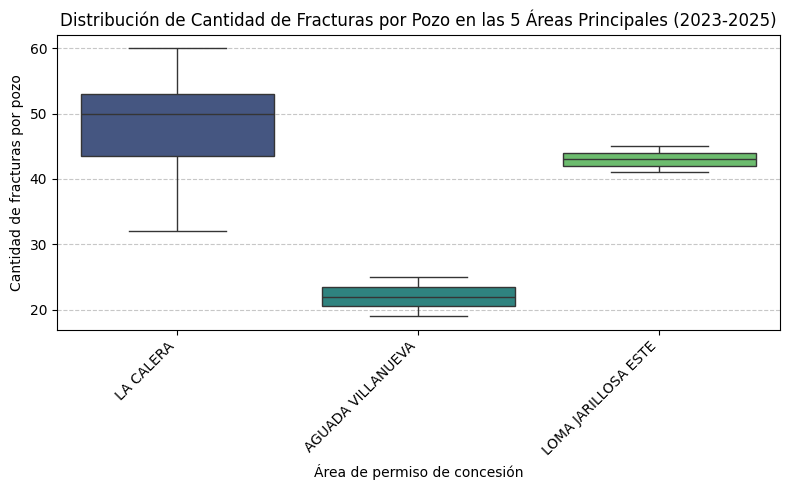

In [92]:
# Boxplot ahora de las 5 areas principales

import matplotlib.pyplot as plt
# Identificar las 5 áreas con mayor cantidad total de fracturas en el período 2023-2025
top_5_areas_total = ef_ypf_filtrado.groupby('Área permiso concesión')['Cantidad fracturas'].sum().nlargest(5).index.tolist()

# Filtrar el DataFrame para incluir solo las 5 áreas principales
ef_ypf_top5 = ef_ypf_filtrado[ef_ypf_filtrado['Área permiso concesión'].isin(top_5_areas_total)]

# Crear el boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=ef_ypf_top5, x='Área permiso concesión', y='Cantidad fracturas', palette='viridis')

# Título y etiquetas
plt.title('Distribución de Cantidad de Fracturas por Pozo en las 5 Áreas Principales (2023-2025)')
plt.xlabel('Área de permiso de concesión')
plt.ylabel('Cantidad de fracturas por pozo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Este gráfico es un diagrama de dispersión (scatter plot) que muestra la relación entre la cantidad de fracturas hidráulicas y el volumen de agua inyectada por pozo en las cinco principales áreas de concesión de YPF en Vaca Muerta, durante el período 2023-2025.

Ejes:
Eje X (horizontal): Agua Inyectada (m³)

Eje Y (vertical): Cantidad de Fracturas

Contenido:
Cada punto representa un pozo.

Los colores indican diferentes áreas de concesión:

🔵 LOMA CAMPANA

🔵 BANDURRIA SUR

🔵 LA AMARGA CHICA

🔵 AGUADA DEL CHAÑAR

🔵 LA ANGOSTURA SUR I

Se observa una relación positiva fuerte: a mayor cantidad de agua inyectada, mayor cantidad de fracturas, lo que sugiere un comportamiento esperado en operaciones de fractura hidráulica.

Interpretación:
La tendencia sugiere que existe una correlación casi lineal entre agua inyectada y cantidad de fracturas.

Algunos puntos presentan valores atípicos, como:

Pozos con mucha agua pero relativamente pocas fracturas.

Pozos con muchas fracturas y no tanta agua.

Las áreas LOMA CAMPANA y BANDURRIA SUR parecen tener mayor densidad de datos, indicando mayor actividad o más pozos fracturados en el período analizado.

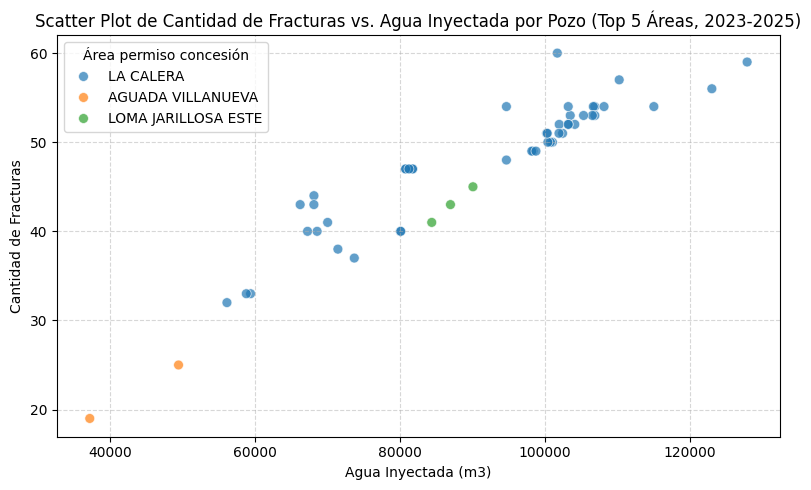

In [93]:
# prompt: scatterplot

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ef_ypf_top5, x='Agua inyectada (m3)', y='Cantidad fracturas', hue='Área permiso concesión', s=50, alpha=0.7)

plt.title('Scatter Plot de Cantidad de Fracturas vs. Agua Inyectada por Pozo (Top 5 Áreas, 2023-2025)')
plt.xlabel('Agua Inyectada (m3)')
plt.ylabel('Cantidad de Fracturas')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [94]:
# prompt: calcular la correlación entre ambas variables

correlation = ef_ypf_top5['Agua inyectada (m3)'].corr(ef_ypf_top5['Cantidad fracturas'])
print(f'La correlación entre "Agua inyectada (m3)" y "Cantidad fracturas" es: {correlation:.2f}')


La correlación entre "Agua inyectada (m3)" y "Cantidad fracturas" es: 0.93


Este gráfico es un diagrama de dispersión (scatter plot) que muestra la relación entre la cantidad de fracturas hidráulicas y la longitud de la rama horizontal por pozo en las cinco principales áreas de concesión de YPF en Vaca Muerta durante el período 2023-2025.

Ejes:
Eje X (horizontal): Longitud Rama Horizontal (m)

Eje Y (vertical): Cantidad de Fracturas

Elementos clave:
Cada punto representa un pozo individual.

Los colores distinguen entre las cinco áreas de concesión:

🔵 LOMA CAMPANA

🔵 BANDURRIA SUR

🔵 LA AMARGA CHICA

🔵 AGUADA DEL CHAÑAR

🔵 LA ANGOSTURA SUR I

Se observa una correlación positiva clara: a mayor longitud de la rama horizontal del pozo, mayor cantidad de fracturas.

Interpretación:
Esta relación es esperada, ya que una mayor longitud horizontal permite distribuir más etapas de fractura.

Hay cierta dispersión vertical, lo que sugiere que, para una misma longitud, la cantidad de fracturas puede variar dependiendo de la técnica, la geología o decisiones operativas.

Algunos pozos (outliers) tienen muchas fracturas con ramas relativamente cortas, o pocas fracturas con ramas largas.

Conclusión:
Este gráfico evidencia que la longitud de la rama horizontal es un factor determinante en la cantidad de fracturas realizadas por pozo, aunque no el único.

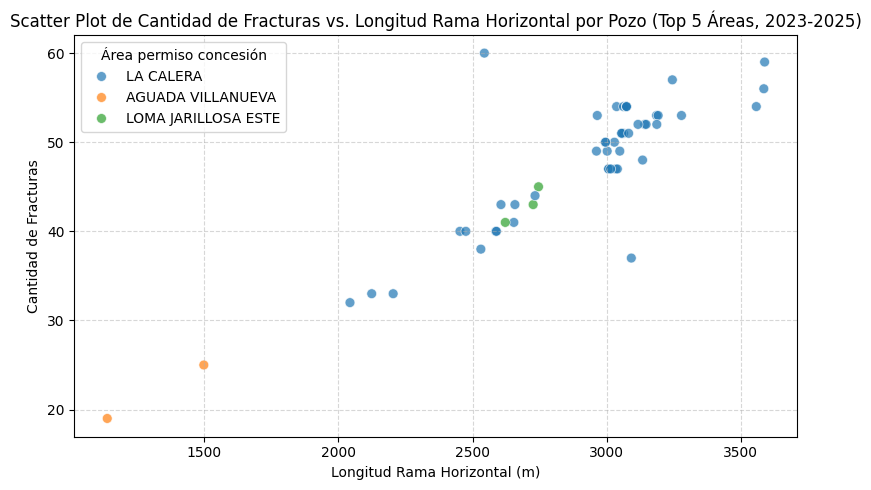

In [95]:
# prompt: scatterplot profundidad

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ef_ypf_top5, x='Longitud rama horizontal (m)', y='Cantidad fracturas', hue='Área permiso concesión', s=50, alpha=0.7)

plt.title('Scatter Plot de Cantidad de Fracturas vs. Longitud Rama Horizontal por Pozo (Top 5 Áreas, 2023-2025)')
plt.xlabel('Longitud Rama Horizontal (m)')
plt.ylabel('Cantidad de Fracturas')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [96]:
# prompt: calcular la correlación entre ambas variables

correlation_longitud = ef_ypf_top5['Longitud rama horizontal (m)'].corr(ef_ypf_top5['Cantidad fracturas'])
print(f'La correlación entre "Longitud rama horizontal (m)" y "Cantidad fracturas" es: {correlation_longitud:.2f}')


La correlación entre "Longitud rama horizontal (m)" y "Cantidad fracturas" es: 0.89


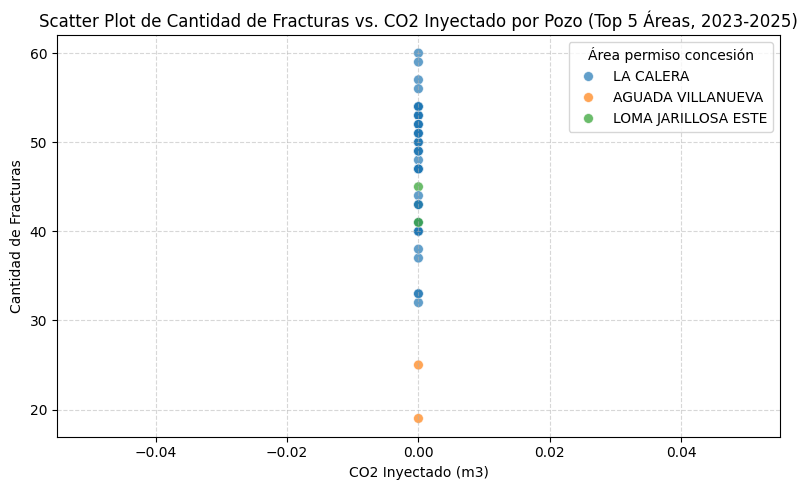

La correlación entre "CO2 inyectado (m3)" y "Cantidad fracturas" es: nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [97]:
# prompt: scatterplot entre cantidad de fracturas y co2

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ef_ypf_top5, x='CO2 inyectado (m3)', y='Cantidad fracturas', hue='Área permiso concesión', s=50, alpha=0.7)

plt.title('Scatter Plot de Cantidad de Fracturas vs. CO2 Inyectado por Pozo (Top 5 Áreas, 2023-2025)')
plt.xlabel('CO2 Inyectado (m3)')
plt.ylabel('Cantidad de Fracturas')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

correlation_co2 = ef_ypf_top5['CO2 inyectado (m3)'].corr(ef_ypf_top5['Cantidad fracturas'])
print(f'La correlación entre "CO2 inyectado (m3)" y "Cantidad fracturas" es: {correlation_co2:.2f}')

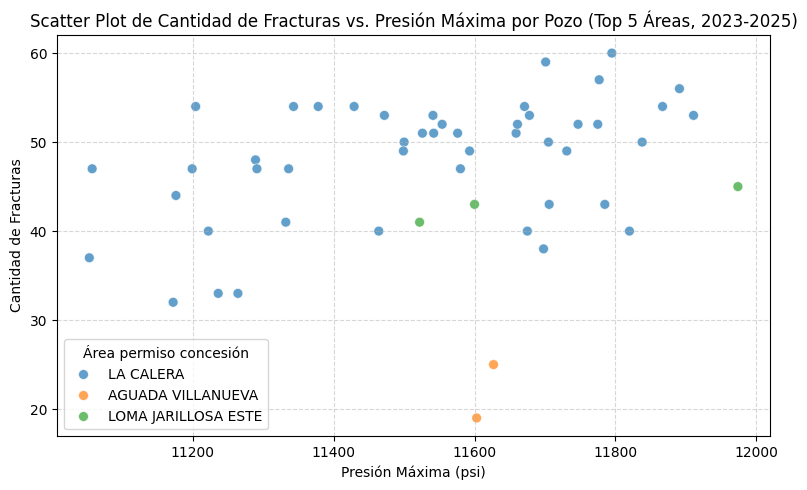

La correlación entre "Presión máxima (psi)" y "Cantidad fracturas" es: 0.29


In [98]:
# prompt: scatterplot entre cantidad de fracturas y presión

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(data=ef_ypf_top5, x='Presión máxima (psi)', y='Cantidad fracturas', hue='Área permiso concesión', s=50, alpha=0.7)

plt.title('Scatter Plot de Cantidad de Fracturas vs. Presión Máxima por Pozo (Top 5 Áreas, 2023-2025)')
plt.xlabel('Presión Máxima (psi)')
plt.ylabel('Cantidad de Fracturas')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

correlation_pressure = ef_ypf_top5['Presión máxima (psi)'].corr(ef_ypf_top5['Cantidad fracturas'])
print(f'La correlación entre "Presión máxima (psi)" y "Cantidad fracturas" es: {correlation_pressure:.2f}')


DataFrame con escalado MinMaxScaler:
      ID pozo    Cuenca Área permiso concesión Yacimiento  Tipo reservorio  \
2638   162181  NEUQUINA              LA CALERA  LA CALERA  NO CONVENCIONAL   
2639   162182  NEUQUINA              LA CALERA  LA CALERA  NO CONVENCIONAL   
2640   162183  NEUQUINA              LA CALERA  LA CALERA  NO CONVENCIONAL   
3350   163134  NEUQUINA              LA CALERA  LA CALERA  NO CONVENCIONAL   
3351   163135  NEUQUINA              LA CALERA  LA CALERA  NO CONVENCIONAL   

     Subtipo reservorio  Longitud rama horizontal (m)  Cantidad fracturas  \
2638              SHALE                      0.359037            0.363636   
2639              SHALE                      0.413301            0.295455   
2640              SHALE                      0.399429            0.409091   
3350              SHALE                      0.554876            0.500000   
3351              SHALE                      0.559772            0.477273   

     Tipo terminación  Arena bo

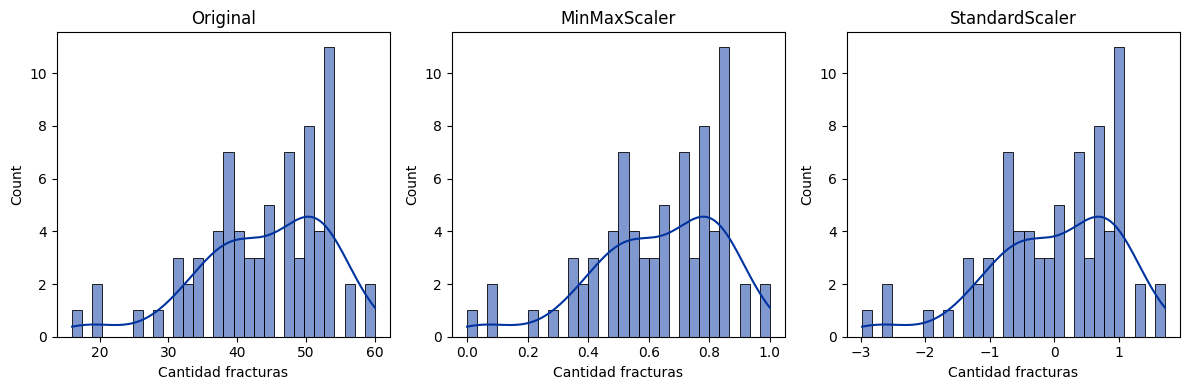

In [99]:
# prompt: Como hacer escalado

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar las columnas numéricas a escalar
numerical_cols = ['Longitud rama horizontal (m)', 'Cantidad fracturas',
                  'Arena bombeada nacional (tn)', 'Arena bombeada importada (tn)',
                  'Agua inyectada (m3)', 'CO2 inyectado (m3)',
                  'Presión máxima (psi)', 'Potencia equipos fractura (hp)']

# Crear copias del DataFrame para aplicar diferentes escalados
df_scaled_minmax = ef_pluspe.copy()
df_scaled_standard = ef_pluspe.copy()

# Inicializar escaladores
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Aplicar MinMaxScaler a las columnas seleccionadas
df_scaled_minmax[numerical_cols] = minmax_scaler.fit_transform(ef_pluspe[numerical_cols])

# Aplicar StandardScaler a las columnas seleccionadas
df_scaled_standard[numerical_cols] = standard_scaler.fit_transform(ef_pluspe[numerical_cols])

# Mostrar las primeras filas de los DataFrames escalados para verificar
print("DataFrame con escalado MinMaxScaler:")
print(df_scaled_minmax.head())

print("\nDataFrame con escalado StandardScaler:")
print(df_scaled_standard.head())

# Opcional: Visualizar la distribución de una columna escalada para verificar el resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(ef_pluspe['Cantidad fracturas'], bins=30, kde=True, color='#0033A0')
plt.title('Original')

plt.subplot(1, 3, 2)
sns.histplot(df_scaled_minmax['Cantidad fracturas'], bins=30, kde=True, color='#0033A0')
plt.title('MinMaxScaler')

plt.subplot(1, 3, 3)
sns.histplot(df_scaled_standard['Cantidad fracturas'], bins=30, kde=True, color='#0033A0')
plt.title('StandardScaler')

plt.tight_layout()
plt.show()


In [106]:
# prompt: Hacer one hot encoding

import pandas as pd
# Identificar las columnas categóricas para One-Hot Encoding
categorical_cols = ['Área permiso concesión', 'Yacimiento', 'Tipo reservorio', 'Subtipo reservorio', 'Tipo terminación']

# Aplicar One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(ef_pluspe, columns=categorical_cols, dtype=int) # Use dtype=int for 0/1 integers

# Mostrar las primeras filas del DataFrame con las nuevas columnas one-hot encoded
print("DataFrame con One-Hot Encoding:")
print(df_encoded.head())

# Mostrar las nuevas columnas creadas
print("\nNuevas columnas creadas después de One-Hot Encoding:")
print([col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_cols)])



DataFrame con One-Hot Encoding:
      ID pozo    Cuenca  Longitud rama horizontal (m)  Cantidad fracturas  \
2638   162181  NEUQUINA                        2018.0                  32   
2639   162182  NEUQUINA                        2151.0                  29   
2640   162183  NEUQUINA                        2117.0                  34   
3350   163134  NEUQUINA                        2498.0                  38   
3351   163135  NEUQUINA                        2510.0                  37   

      Arena bombeada nacional (tn)  Arena bombeada importada (tn)  \
2638                       8386.63                            0.0   
2639                       6470.52                            0.0   
2640                       8873.59                            0.0   
3350                       8213.33                            0.0   
3351                       7985.75                            0.0   

      Agua inyectada (m3)  CO2 inyectado (m3)  Presión máxima (psi)  \
2638              6

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_xtj7ei/s9fcsvwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_xtj7ei/4bgtw7dc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38419', 'data', 'file=/tmp/tmpp_xtj7ei/s9fcsvwm.json', 'init=/tmp/tmpp_xtj7ei/4bgtw7dc.json', 'output', 'file=/tmp/tmpp_xtj7ei/prophet_model71yrmgm1/prophet_model-20250709201125.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds        yhat  yhat_lower  yhat_upper
88 2030-08-01  242.535274  231.123479  253.205954
89 2030-09-01  372.261752  362.684713  382.814100
90 2030-10-01  389.042450  378.993882  398.793611
91 2030-11-01  800.267375  790.200714  811.463577
92 2030-12-01  468.261553  457.649827  478.582728


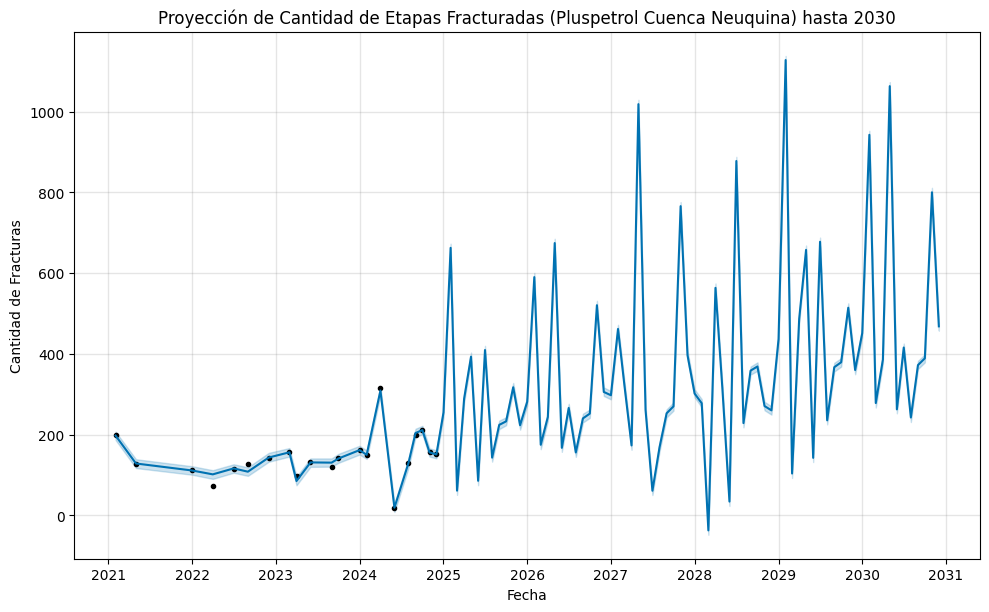

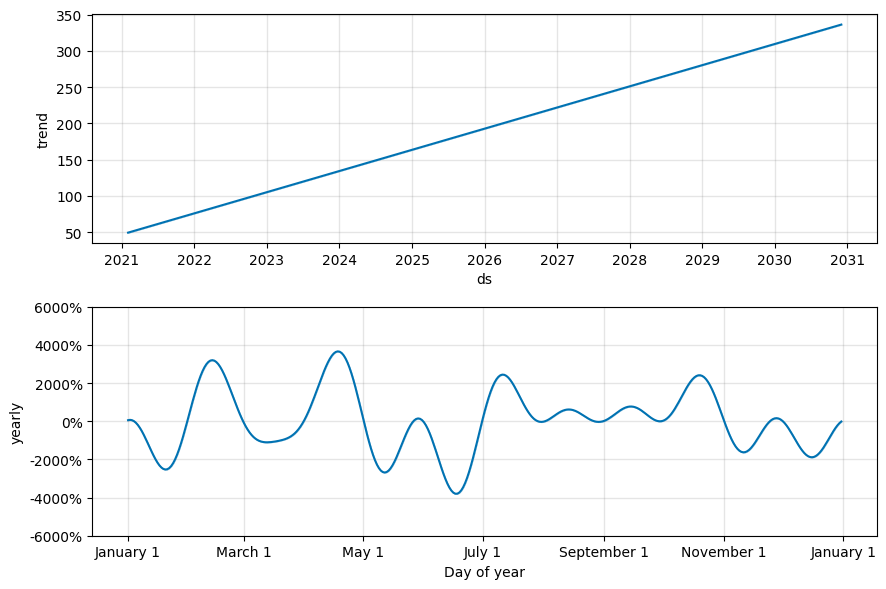

In [107]:
# prompt: aplicar modelo prophet proyección 2030 de etapas fracturadas

import pandas as pd
import matplotlib.pyplot as plt
!pip install prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go

# Preparar los datos para Prophet
# Agrupar por Año y Mes y sumar la cantidad de fracturas
df_prophet = ef_pluspe.groupby(['Año', 'Mes'])['Cantidad fracturas'].sum().reset_index()

# Crear una columna de fecha combinada
df_prophet['ds'] = pd.to_datetime(df_prophet['Año'].astype(str) + '-' + df_prophet['Mes'].astype(str) + '-01')

# Renombrar columnas a 'ds' y 'y' como requiere Prophet
df_prophet = df_prophet.rename(columns={'Cantidad fracturas': 'y'})

# Filtrar datos hasta el último registro disponible (por ejemplo, fin de 2024 si es el caso)
# Asegúrate de que tu dataframe df_prophet contiene datos hasta 2024
df_prophet = df_prophet[df_prophet['ds'] <= '2024-12-01']


# Crear y entrenar el modelo Prophet
model = Prophet(
    seasonality_mode='multiplicative', # Ajustar estacionalidad si es necesario
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
model.fit(df_prophet[['ds', 'y']])

# Crear un dataframe para la proyección hasta 2030
future = model.make_future_dataframe(periods=12 * (2030 - df_prophet['ds'].dt.year.max()), freq='MS')

# Realizar la proyección
forecast = model.predict(future)

# Mostrar las columnas principales del pronóstico
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Graficar el pronóstico usando matplotlib
fig1 = model.plot(forecast)
plt.title('Proyección de Cantidad de Etapas Fracturadas (Pluspetrol Cuenca Neuquina) hasta 2030')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Fracturas')
plt.show()

# Opcional: Graficar componentes del pronóstico
fig2 = model.plot_components(forecast)
plt.show()

# Opcional: Gráfico interactivo con Plotly
fig = plot_plotly(model, forecast)
fig.update_layout(
    title='Proyección Interactiva de Cantidad de Etapas Fracturadas (Pluspetrol Cuenca Neuquina) hasta 2030',
    xaxis_title='Fecha',
    yaxis_title='Cantidad de Fracturas'
)
fig.show()
